# Import Library

In [35]:
# Mengimport library-library yang akan digunakan
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [2]:
# Proses load data
url = "https://drive.google.com/uc?export=download&id=1aghEPd2qZk0gqQERg8PLai4pjcr2es3J"
output = 'laptop.csv'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1aghEPd2qZk0gqQERg8PLai4pjcr2es3J
To: /content/laptop.csv
100%|██████████| 174k/174k [00:00<00:00, 47.4MB/s]


'laptop.csv'

In [3]:
# Membaca data
laptop_df = pd.read_csv('laptop.csv')
laptop_df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


# Exploratory Data Analysis (EDA)

In [4]:
# Melihat informasi pada data
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [5]:
# Melihat deskripsi statistik pada data
laptop_df.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


Dari info dan deskripsi statistik diatas, ada beberapa hal yang dapat digaris bawahi yaitu :
- Ada beberapa kolom yang tidak diperlukan dalam analisis data seperti kolom 'Unnamed:0.1' dan 'Unnamed:0'
- Nilai pada kolom 'spec_rating' bisa lebih disederhanakan agar mudah dibaca
- Nilai dan tipe data pada kolom 'Ram', 'ROM' dapat diubah menjadi numerik
- Terlihat data anomali (_outlier_) dimana data harga maksimalnya 5 kali lipat dari harga pada Q3 (75%)

In [6]:
# Dari data laptop berikut terdapat 2 kolom yang tidak diperlukan yaitu 'Unnamed:0.1' dan 'Unnamed: 0'
# maka dari itu data berikut dapat di drop

laptop_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
laptop_df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [7]:
# Nilai pada kolom 'spec_rating' disederhanakan dengan mengubah semua nilai jadi hanya 2 angka dibelakang koma
laptop_df['spec_rating'] = laptop_df['spec_rating'].apply(lambda x: round(x, 2))

# Nilai dan tipe data pada kolom 'Ram', 'ROM' diubah menjadi numerik
laptop_df['Ram'] = laptop_df['Ram'].str.replace('GB', '').astype(int)
laptop_df['ROM'] = laptop_df['ROM'].str.replace('GB', '').str.replace('TB', '000').astype(int)

laptop_df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.00,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.00,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.32,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.00,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.32,Apple M1,Octa Core (4P + 4E),8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


<Axes: xlabel='price'>

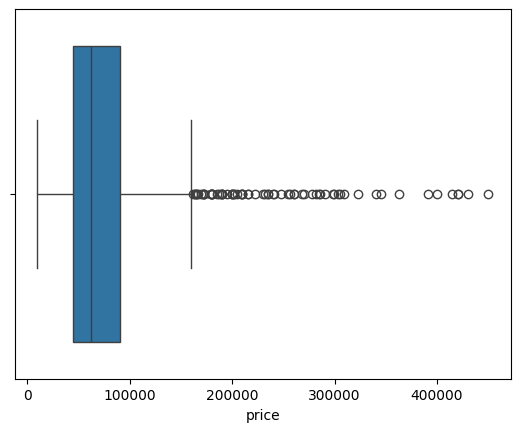

In [8]:
# Menangani Outliers

# Melakukan visualisasi pada kolom harga menggunakan boxplot
sns.boxplot(x=laptop_df['price'])

In [9]:
# Mengatasi outlier pada data menggunakan IQR Method
Q1 = laptop_df['price'].quantile(0.25)
Q3 = laptop_df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

laptop_df = laptop_df[(laptop_df['price'] >= lower_bound) & (laptop_df['price'] <= upper_bound)]

laptop_df.shape

(822, 16)

## Univariate Analysis

In [10]:
# membagi features menjadi categorical dan numerical
categorical_features = ['brand','processor','CPU','Ram_type','ROM_type','GPU','OS']
numerical_features = ['price','spec_rating','Ram','ROM','display_size','resolution_width','resolution_height','warranty']

### Categorical features

           jumlah sample  persentase
brand                               
HP                   170        20.7
Lenovo               163        19.8
Asus                 149        18.1
Dell                  93        11.3
Acer                  83        10.1
MSI                   57         6.9
Samsung               22         2.7
Infinix               15         1.8
LG                     8         1.0
Xiaomi                 8         1.0
Apple                  8         1.0
Gigabyte               6         0.7
Fujitsu                6         0.7
Zebronics              4         0.5
Ultimus                4         0.5
Chuwi                  3         0.4
Realme                 3         0.4
Wings                  3         0.4
Tecno                  3         0.4
AXL                    2         0.2
Microsoft              2         0.2
Honor                  2         0.2
Huawei                 2         0.2
Ninkear                1         0.1
Primebook              1         0.1
V

Text(0, 0.5, 'Brand')

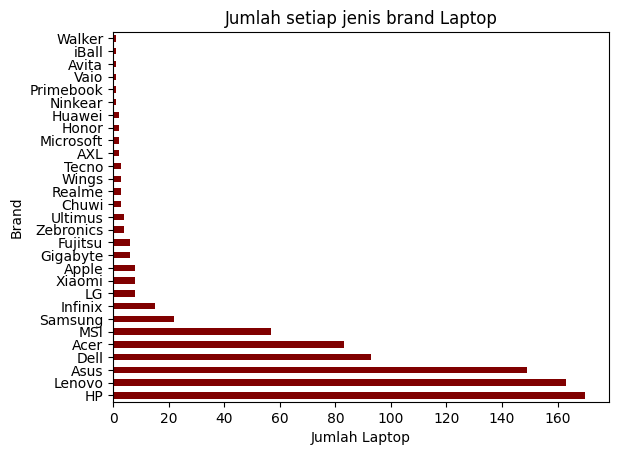

In [11]:
# Fitur brand
brand = categorical_features[0]
count = laptop_df[brand].value_counts()
percent = 100 * laptop_df[brand].value_counts(normalize=True)

# memasukkan data ke data frame
df = pd.DataFrame({'jumlah sample': count, 'persentase': percent.round(1)})
print(df)

# Melakukan plot terhadap jumlah laptop setiap brand
count.plot(kind='barh', title='Jumlah setiap jenis brand Laptop', color='maroon')
plt.xlabel('Jumlah Laptop')
plt.ylabel('Brand')

In [12]:
# Fitur processor
processor = categorical_features[1]
count = laptop_df[processor].value_counts()
percent = 100 * laptop_df[processor].value_counts(normalize=True)

# memasukkan data ke data frame
df = pd.DataFrame({'jumlah sample': count, 'persentase': percent.round(1)})
print(df)

                               jumlah sample  persentase
processor                                               
12th Gen Intel Core i5 1235U              49         6.0
13th Gen Intel Core i5 1335U              41         5.0
12th Gen Intel Core i3 1215U              38         4.6
11th Gen Intel Core i3 1115G4             36         4.4
12th Gen Intel Core i5 12450H             33         4.0
...                                      ...         ...
10th Gen Intel Core i7 10870H              1         0.1
5th Gen AMD Ryzen 5 5625U                  1         0.1
5th Gen AMD Ryzen 7  5825U                 1         0.1
12th Gen Intel Core i5 1230U               1         0.1
7th Gen AMD Ryzen 9 7940HS                 1         0.1

[165 rows x 2 columns]


                                 jumlah sample  persentase
CPU                                                       
Quad Core, 8 Threads                       130        15.8
Hexa Core, 12 Threads                      125        15.2
10 Cores (2P + 8E), 12 Threads             121        14.7
Octa Core, 16 Threads                       95        11.6
12 Cores (4P + 8E), 16 Threads              77         9.4
Dual Core, 4 Threads                        55         6.7
Hexa Core (2P + 4E), 8 Threads              44         5.4
Octa Core (4P + 4E), 12 Threads             43         5.2
Dual Core, 2 Threads                        36         4.4
14 Cores (6P + 8E), 20 Threads              30         3.6
10 Cores (6P + 4E), 16 Threads              24         2.9
5 Cores (1P + 4E), 6 Threads                 7         0.9
14 Cores (6P + 8E)                           7         0.9
16 Cores (8P + 8E), 24 Threads               6         0.7
Octa Core (4P + 4E)                          5         0

Text(0, 0.5, 'CPU')

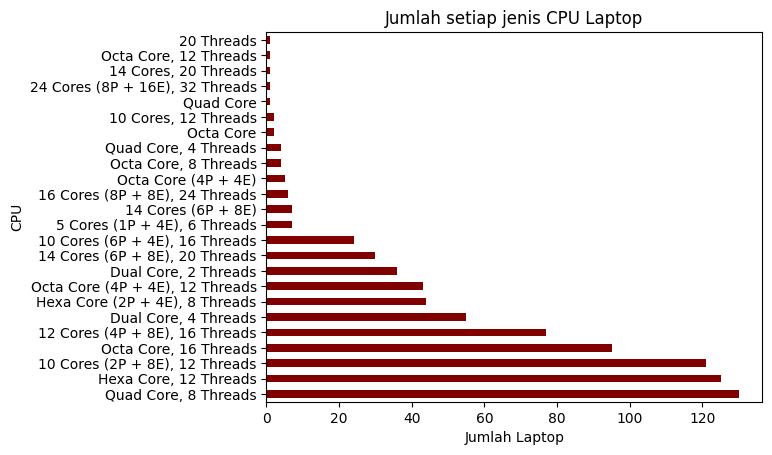

In [13]:
# Fitur CPU
cpu = categorical_features[2]
count = laptop_df[cpu].value_counts()
percent = 100 * laptop_df[cpu].value_counts(normalize=True)

# memasukkan data ke data frame
df = pd.DataFrame({'jumlah sample': count, 'persentase': percent.round(1)})
print(df)

# Melakukan plot terhadap jumlah laptop setiap CPU
count.plot(kind='barh', title='Jumlah setiap jenis CPU Laptop', color='maroon')
plt.xlabel('Jumlah Laptop')
plt.ylabel('CPU')

          jumlah sample  persentase
Ram_type                           
DDR4                497        60.5
LPDDR5              130        15.8
DDR5                119        14.5
LPDDR4X              41         5.0
LPDDR4               14         1.7
LPDDR4x              13         1.6
LPDDR5X               2         0.2
DDR3                  2         0.2
Unified               1         0.1
DDR4-                 1         0.1
LPDDR5x               1         0.1
DDR                   1         0.1


Text(0, 0.5, 'Ram_type')

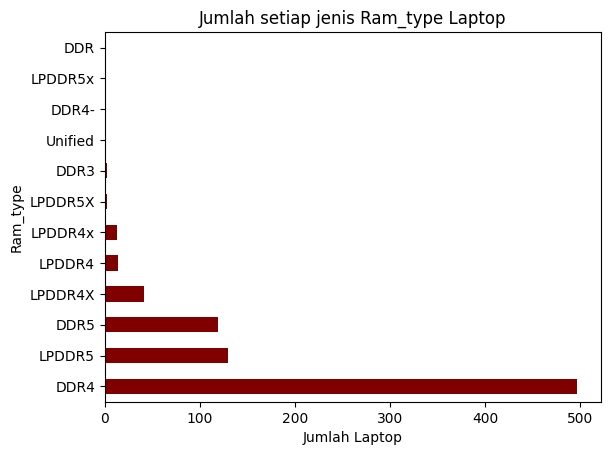

In [14]:
# Fitur Ram_type
Ram_type = categorical_features[3]
count = laptop_df[Ram_type].value_counts()
percent = 100 * laptop_df[Ram_type].value_counts(normalize=True)

# memasukkan data ke data frame
df = pd.DataFrame({'jumlah sample': count, 'persentase': percent.round(1)})
print(df)

# Melakukan plot terhadap jumlah laptop setiap Ram_type
count.plot(kind='barh', title='Jumlah setiap jenis Ram_type Laptop', color='maroon')
plt.xlabel('Jumlah Laptop')
plt.ylabel('Ram_type')

           jumlah sample  persentase
ROM_type                            
SSD                  801        97.4
Hard-Disk             21         2.6


Text(0, 0.5, 'Rom_type')

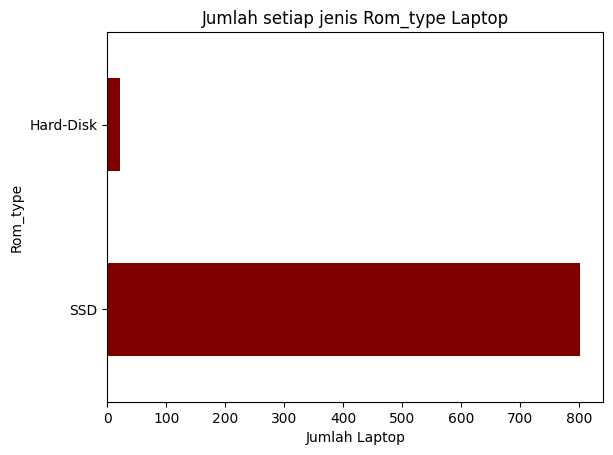

In [15]:
# Fitur Rom_type
Rom_type = categorical_features[4]
count = laptop_df[Rom_type].value_counts()
percent = 100 * laptop_df[Rom_type].value_counts(normalize=True)

# memasukkan data ke data frame
df = pd.DataFrame({'jumlah sample': count, 'persentase': percent.round(1)})
print(df)

# Melakukan plot terhadap jumlah laptop setiap Rom_type
count.plot(kind='barh', title='Jumlah setiap jenis Rom_type Laptop', color='maroon')
plt.xlabel('Jumlah Laptop')
plt.ylabel('Rom_type')

In [16]:
# Fitur GPU
GPU = categorical_features[5]
count = laptop_df[GPU].value_counts()
percent = 100 * laptop_df[GPU].value_counts(normalize=True)

# memasukkan data ke data frame
df = pd.DataFrame({'jumlah sample': count, 'persentase': percent.round(1)})
print(df)

                             jumlah sample  persentase
GPU                                                   
Intel Iris Xe Graphics                  98        11.9
Intel UHD Graphics                      63         7.7
Intel Integrated UHD                    61         7.4
AMD Radeon AMD                          55         6.7
AMD Radeon Graphics                     54         6.6
...                                    ...         ...
AMD Radeon Vega 6                        1         0.1
2GB NVIDIA GeForce MX250                 1         0.1
Integrated UHD Graphics 620              1         0.1
Intel Integrated UHD 620                 1         0.1
4GB AMD Radeon RX 5600M                  1         0.1

[115 rows x 2 columns]


                  jumlah sample  persentase
OS                                         
Windows 11 OS               723        88.0
Windows 10 OS                27         3.3
DOS OS                       18         2.2
Windows 11  OS               13         1.6
Windows 10  OS               10         1.2
Chrome OS                    10         1.2
Windows OS                    8         1.0
Mac OS                        6         0.7
Ubuntu OS                     2         0.2
DOS 3.0 OS                    2         0.2
Mac 10.15.3\t OS              2         0.2
Android 11 OS                 1         0.1


Text(0, 0.5, 'OS')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


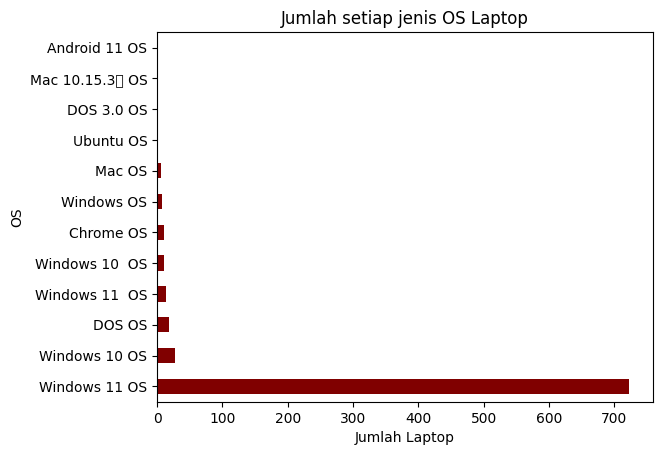

In [17]:
# Fitur OS
os = categorical_features[6]
count = laptop_df[os].value_counts()
percent = 100 * laptop_df[os].value_counts(normalize=True)

# memasukkan data ke data frame
df = pd.DataFrame({'jumlah sample': count, 'persentase': percent.round(1)})
print(df)

# Melakukan plot terhadap jumlah laptop setiap OS
count.plot(kind='barh', title='Jumlah setiap jenis OS Laptop', color='maroon')
plt.xlabel('Jumlah Laptop')
plt.ylabel('OS')

Dari beberapa barplot kolom-kolom kategori diatas, diperoleh :
- Terdapat 29 kategori brand dengan brand terbanyak yaitu HP sebanyak 170 laptop
- Terdapat 165 kategori processor dengan processor terbanyak yaitu 12th Gen Intel Core i5 1235U sebanyak 49 laptop
- Terdapat 24 kategori CPU dengan CPU terbanyak yaitu Quad Core, 8 Threads sebanyak 130 laptop
- Terdapat 12 kategori tipe RAM dengan tipe RAM terbanyak yaitu DDR4 sebanyak 497 laptop
- Terdapat 2 kategori tipe ROM dengen tipe ROM terbanyak yaitu SSD sebanyak 801 laptop
- Terdapat 115 kategori GPU dengan GPU terbanyak yaitu Intel Iris Xe Graphics sebanyak 98 laptop
- Terdapat 12 kategori OS dengan OS terbanyak yaitu Windows 11 OS sebanyak 723 laptop


### Numerical features

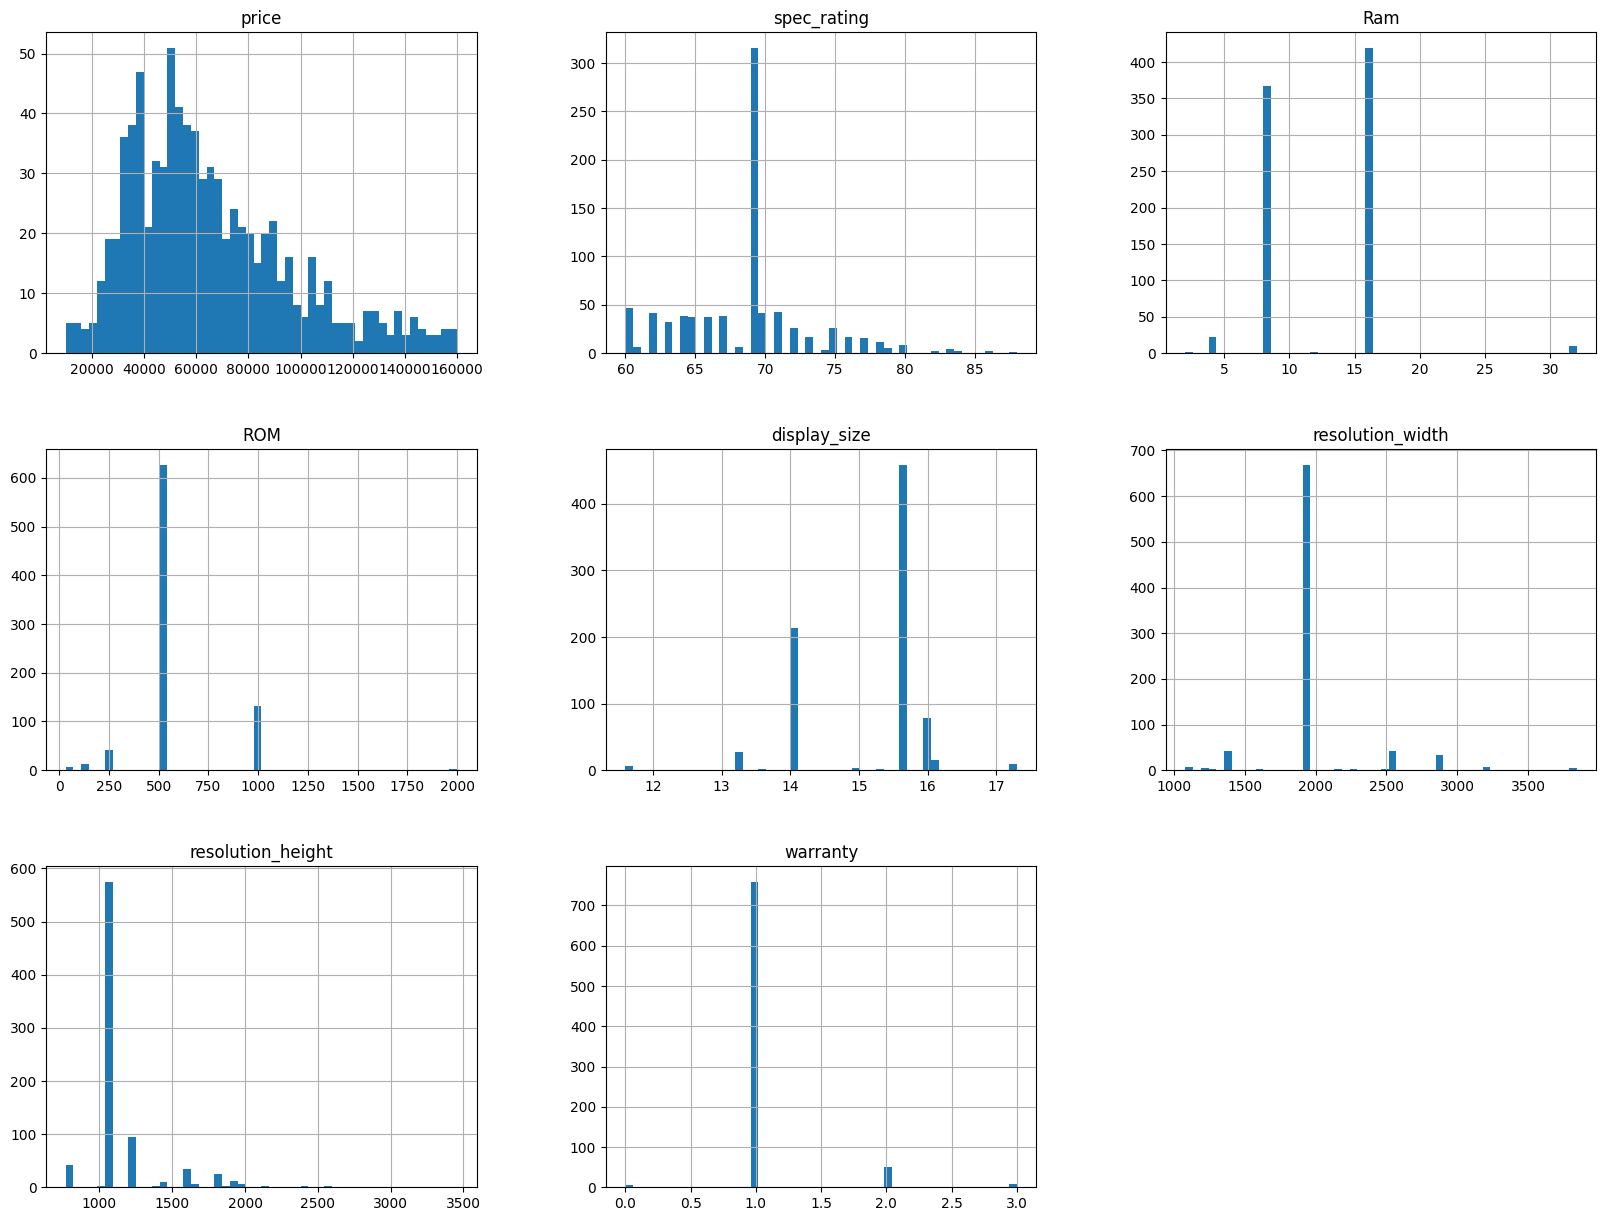

In [18]:
laptop_df.hist(bins=50, figsize=(20,15))
plt.show()

dari histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data, dapat diperoleh beberapa informasi, antara lain:

- Rentang harga laptop cukup tinggi yaitu dari skala 10000 hingga sekitar 160000.
- Harga laptop lebih banyak berada di sekitar kurang dari 100000.
- Distribusi harga miring ke kanan (right-skewed).

## Multivariate Analysis

### Categorical features

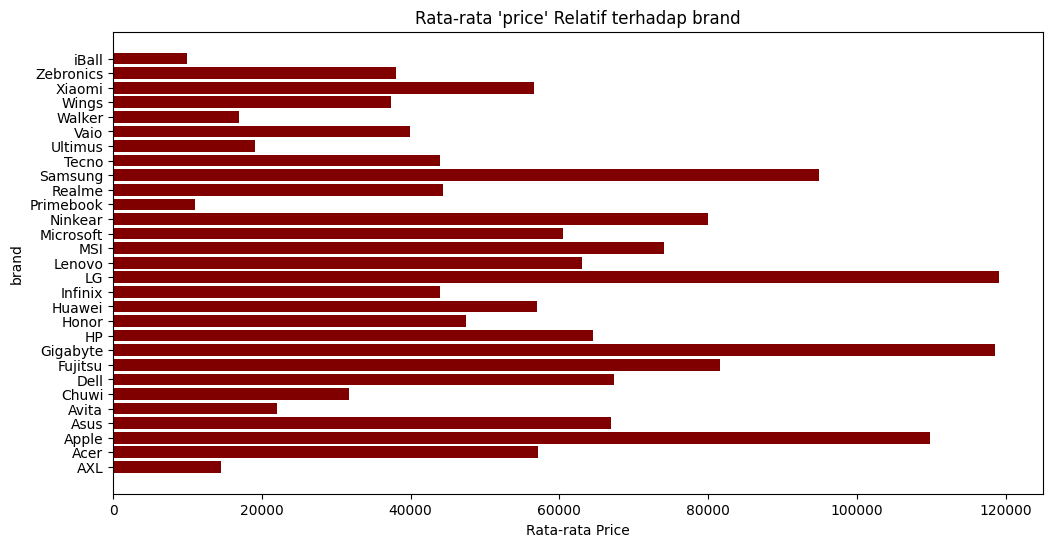

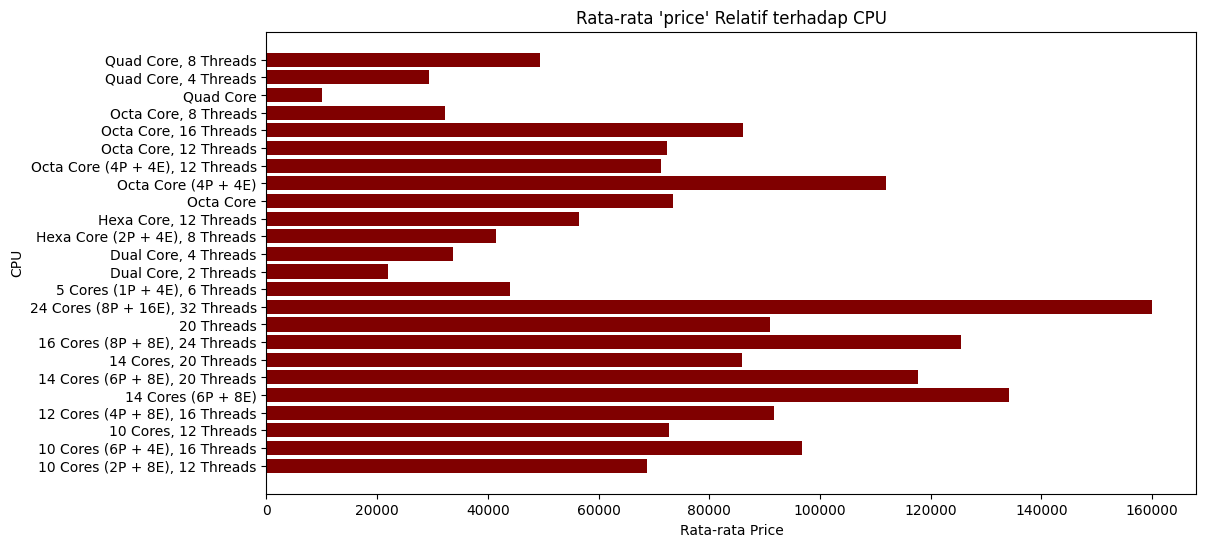

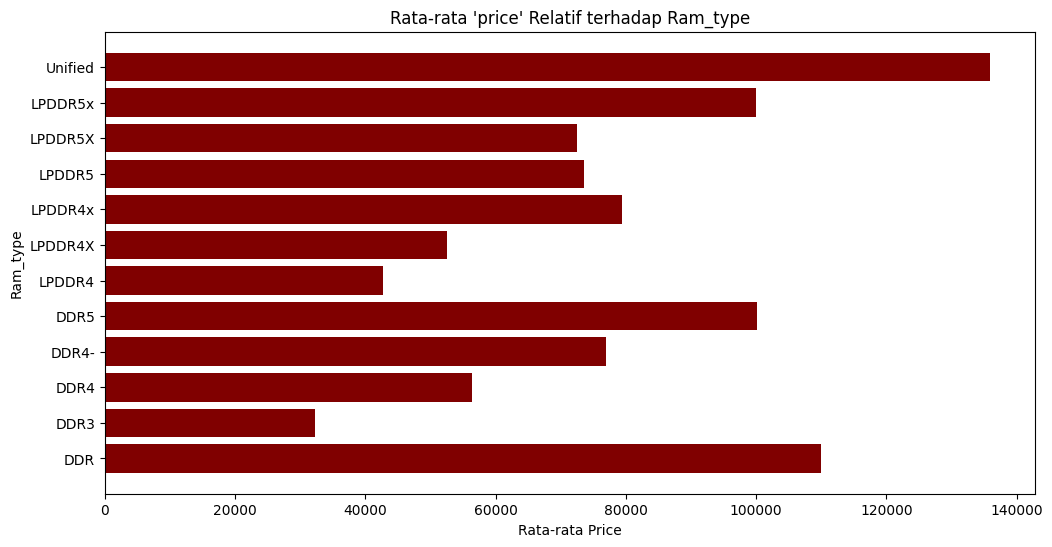

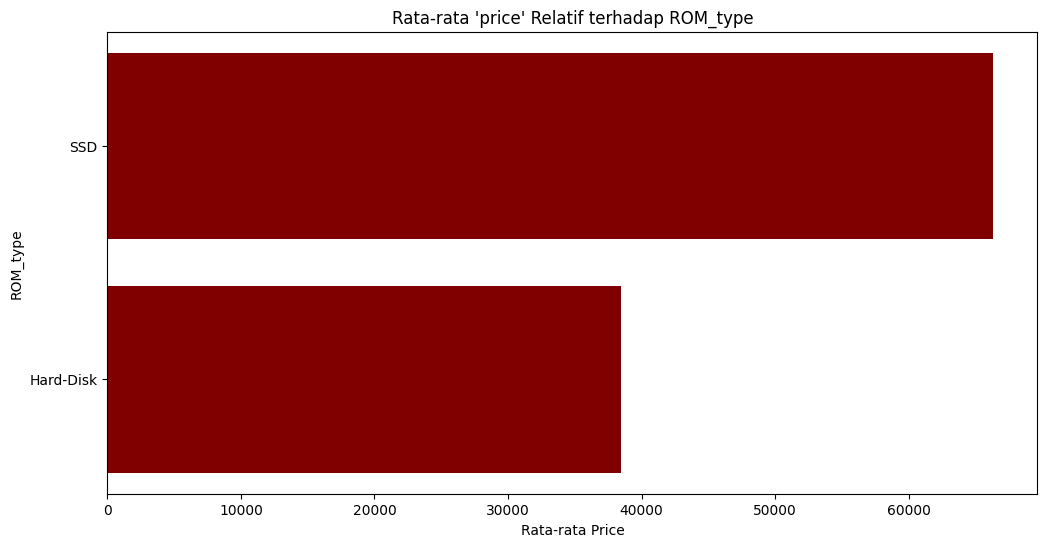

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


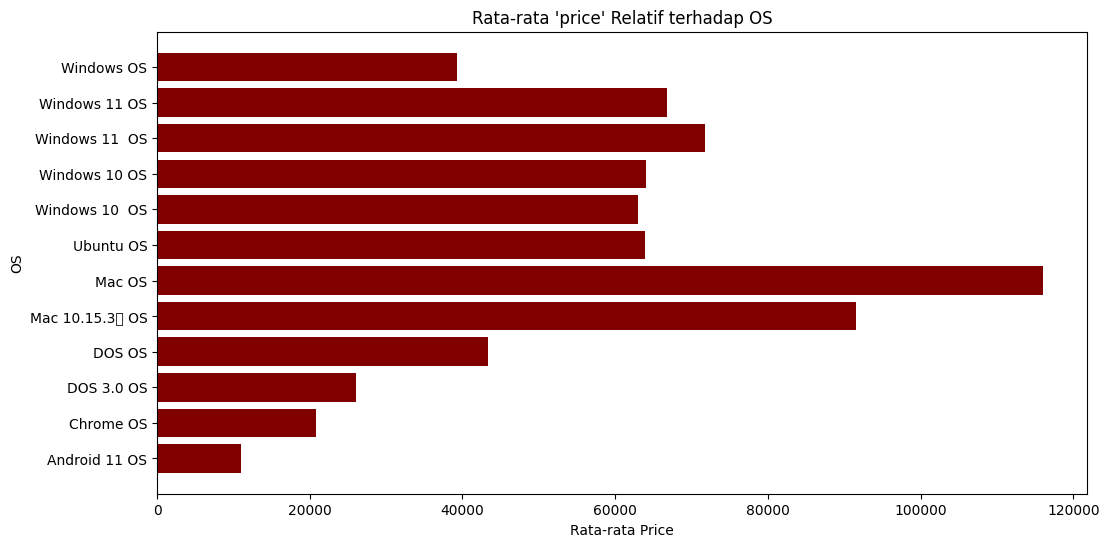

In [19]:
cat_features = ['brand','CPU','Ram_type','ROM_type','OS']

for col in cat_features:
    # Menghitung rata-rata harga untuk setiap kategori dalam kolom
    avg_price = laptop_df.groupby(col)['price'].mean()

    # Membuat bar plot
    plt.figure(figsize=(12, 6))  # Ukuran plot
    plt.barh(avg_price.index,avg_price.values, color='maroon')

    # Menambahkan judul dan label
    plt.title(f"Rata-rata 'price' Relatif terhadap {col}")
    plt.xlabel('Rata-rata Price')
    plt.ylabel(col)

    # Menampilkan plot
    plt.show()

Dari beberapa barplot rata-rata 'price' relatif terhadap fitur-fitur kategori di atas,  insight yang dapat diperoleh yaitu sebagai berikut:

- Beberapa fitur seperti 'brand', 'processor', 'CPU', 'Ram_type', 'GPU','OS' terlalu banyak kategori brand membuat beberapa kategori yang jarang muncul seperti contoh pada kolom brand yaitu Ninkear, Primebook, Vaio, Avita, iBall, Walker menyebabkan data menjadi sparse dan akan menyulitkan dalam memprediksi harga laptop.
- Pada fitur ‘ROM_type’, laptop dengan tipe ROM SSD memiliki rerata yang paling tinggi daripada Hard-Disk. Dari sini dapat disimpulkan bahwa tipe ROM memiliki pengaruh yang tinggi terhadap harga.
- Kesimpulan akhir, fitur tipe ROM memiliki pengaruh tinggi terhadap harga selain itu dapat menghindari dimensionality curse dan data sparse sehingga akan digunakan untuk prediksi harga.

### Numerical features

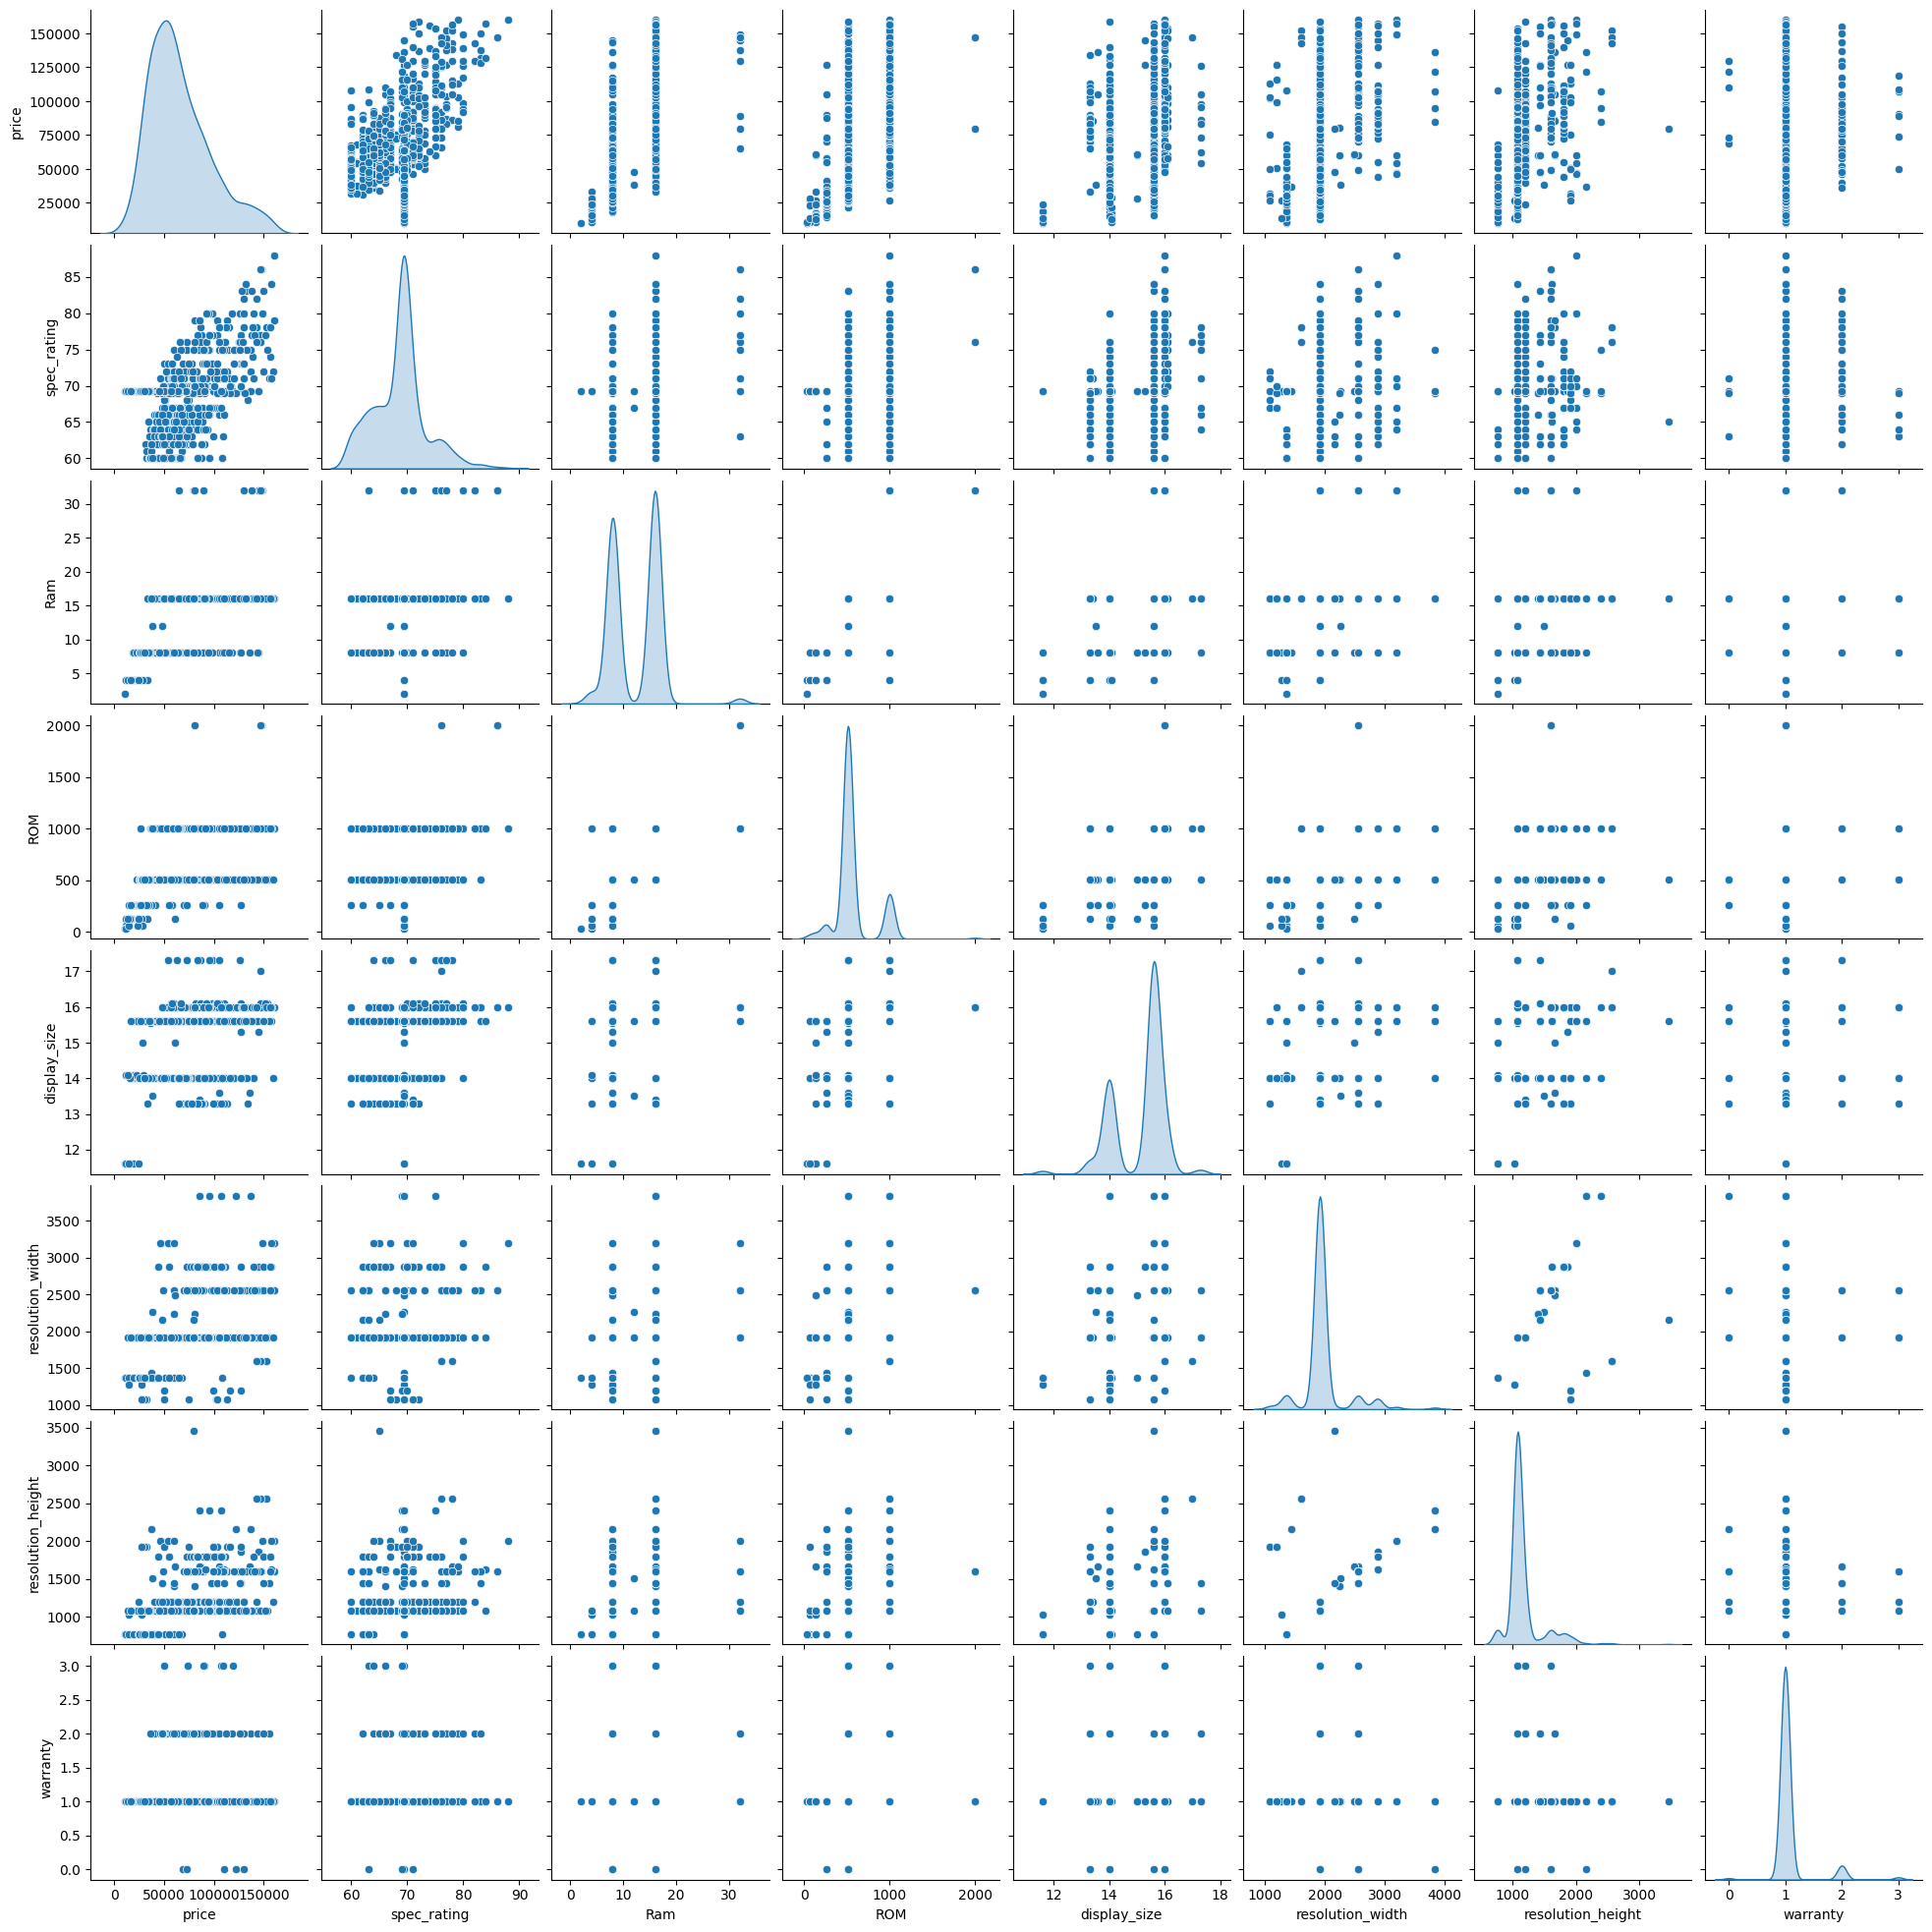

In [20]:
# Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot().
sns.pairplot(laptop_df, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix untuk untuk fitur numerik')

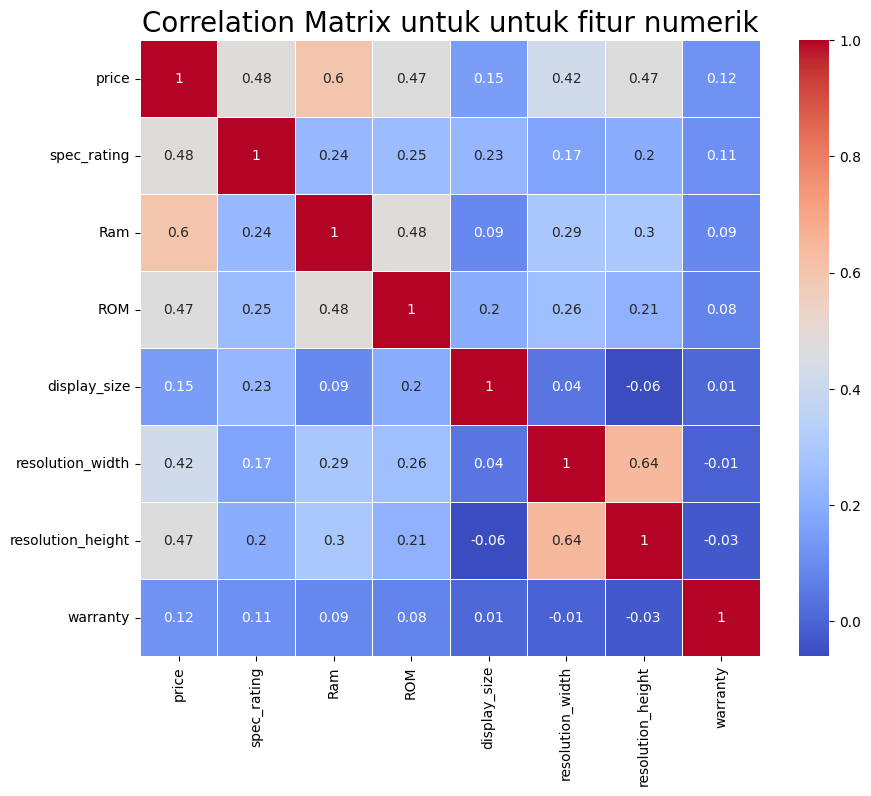

In [21]:
# evaluasi skor korelasi fitur lain terhadap price
plt.figure(figsize=(10,8))
correlation_matrix = laptop_df[numerical_features].corr().round(2)

# untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk untuk fitur numerik", size=20)

Pada pola sebaran data pada pairplot dan correlation matrix diatas, dapat disimpulkan bahwa fitur-fitur seperti 'spec_rating', 'Ram', 'ROM', 'resolution_width','resolution_height' memiliki korelasi positif terhadap fitur 'price'. Sementara itu, fitur 'display_size' dan 'warranty' tidak terlalu berkorelasi sehingga fitur tersebut dapat di-drop bersamaan dengan beberapa fitur kategorikal sebelumnya

In [22]:
# Melakukan drop beberapa kolom yang tidak digunakan untuk model prediksi
laptop_clean_df = laptop_df.drop(['name','brand', 'processor', 'CPU', 'Ram_type', 'GPU', 'OS','display_size','warranty'], axis=1)
laptop_clean_df.head()

,price,spec_rating,Ram,ROM,ROM_type,resolution_width,resolution_height
0,49900,73.00,8,512,SSD,1920.0,1080.0
1,39900,60.00,8,512,SSD,1920.0,1080.0
2,26990,69.32,8,512,SSD,1920.0,1080.0
3,59729,66.00,16,512,SSD,2240.0,1400.0
4,69990,69.32,8,256,SSD,2560.0,1600.0


# Data Preparation

## Encoding fitur kategori menggunakan OneHotEncoder

In [23]:
# Melakukan encoding pada kolom kategorikal
from sklearn.preprocessing import OneHotEncoder
laptop_clean_df = pd.concat([laptop_clean_df, pd.get_dummies(laptop_clean_df['ROM_type'], prefix='ROM_type',dtype='int64')], axis=1)

laptop_clean_df.drop(['ROM_type'], axis=1, inplace=True)
laptop_clean_df.head()

,price,spec_rating,Ram,ROM,resolution_width,resolution_height,ROM_type_Hard-Disk,ROM_type_SSD
0,49900,73.00,8,512,1920.0,1080.0,0,1
1,39900,60.00,8,512,1920.0,1080.0,0,1
2,26990,69.32,8,512,1920.0,1080.0,0,1
3,59729,66.00,16,512,2240.0,1400.0,0,1
4,69990,69.32,8,256,2560.0,1600.0,0,1


### Split Dataset

In [24]:
# Membagi dataset menjadi dua bagian train dan test
from sklearn.model_selection import train_test_split

X = laptop_clean_df.drop(['price'], axis=1)
Y = laptop_clean_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.125, random_state=64)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 822
Total # of sample in train dataset: 719
Total # of sample in test dataset: 103


### Standarisasi

In [25]:
# Melakukan proses scaling dengan standarisasi nilai
from sklearn.preprocessing import StandardScaler

numerical_features = ['spec_rating','Ram','ROM','resolution_width','resolution_height']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

X_train[numerical_features].head()


,spec_rating,Ram,ROM,resolution_width,resolution_height
343,0.533538,0.788008,1.913918,2.603506,1.646674
702,0.971054,0.788008,-0.279396,-0.166171,-0.335867
545,-0.997767,0.788008,-0.279396,-0.166171,-0.335867
687,-0.341493,0.788008,-0.279396,2.603506,2.307520
240,0.166025,-0.943323,-0.279396,-0.166171,-0.335867


In [26]:
X_train[numerical_features].describe().round(4)

,spec_rating,Ram,ROM,resolution_width,resolution_height
count,719.0000,719.0000,719.0000,719.0000,719.0000
mean,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0007,1.0007,1.0007,1.0007,1.0007
min,-1.8728,-2.2418,-2.4368,-2.5896,-1.4813
25%,-0.5603,-0.9433,-0.2794,-0.1662,-0.3359
50%,0.1660,0.7880,-0.2794,-0.1662,-0.3359
75%,0.3148,0.7880,-0.2794,-0.1662,-0.3359
max,3.8149,4.2507,6.4084,5.3732,8.3873


# Model Development

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# siapkan data frame untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse','train_r2','test_r2'],
                      columns=['KNN', 'RandomForest', 'LinearRegression', 'DecisionTree'])

In [28]:
# Membangun model prediksi dengan algoritma KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
models.loc['train_r2','KNN'] = r2_score(y_pred = knn.predict(X_train), y_true=y_train)

In [29]:
# Membangun model prediksi dengan algoritma RandomForest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=32, random_state=64, n_jobs=1)
rf.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred = rf.predict(X_train), y_true=y_train)
models.loc['train_r2','RandomForest'] = r2_score(y_pred = rf.predict(X_train), y_true=y_train)

In [30]:
# Membangun model prediksi dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred = lr.predict(X_train), y_true=y_train)
models.loc['train_r2','LinearRegression'] = r2_score(y_pred = lr.predict(X_train), y_true=y_train)

In [31]:
# Membangun model prediksi dengan algoritma DecisionTree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=32, random_state=64)
dt.fit(X_train, y_train)

models.loc['train_mse','DecisionTree'] = mean_squared_error(y_pred = dt.predict(X_train), y_true=y_train)
models.loc['train_r2','DecisionTree'] = r2_score(y_pred = dt.predict(X_train), y_true=y_train)

# Evaluasi Model

In [32]:
#Scaling data test dengan standarisasi nilai
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [33]:
# Buat variabel mse yang isinya adalah dataframe nilai mse,r2_score data train dan test pada masing-masing algoritma
metrics_eval = pd.DataFrame(columns=['train_mse', 'test_mse','train_r2','test_r2'], index=['KNN','RF','LR','DT'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': rf, 'LR': lr, 'DT': dt}

# Hitung Mean Squared Error dan R2_score masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    metrics_eval.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e6
    metrics_eval.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e6
    metrics_eval.loc[name, 'train_r2'] = r2_score(y_true=y_train, y_pred=model.predict(X_train))
    metrics_eval.loc[name, 'test_r2'] = r2_score(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse
metrics_eval

,train_mse,test_mse,train_r2,test_r2
KNN,276.900381,344.894335,0.698355,0.717994
RF,180.062617,310.72635,0.803846,0.745932
LR,400.116274,452.110872,0.564128,0.630328
DT,165.514435,466.763318,0.819694,0.618347


In [34]:
# Melihat hasil prediksi dari data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_LR,prediksi_DT
220,107690,94047.3,100718.0,82512.0,99612.0


Dari hasil prediksi dan hasil evaluasi model dengan melihat metriks-metriks yang digunakan didapatkan bahwa algoritma dengan hasil prediksi yang paling mendekati yaitu algoritma <b>Random Forest</b> (RF) dengan test_mse(310) dan test_r2(0.74)